<a href="https://colab.research.google.com/github/adiboy-coder/CODEALPHA-INTERNSHIP-TASK-2/blob/main/Car_Price_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name = Aditya Kumbhar

Project = Codealpha Internship Task 2 (Car Price Prediction with
Machine Learning)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
car = pd.read_csv(r"/content/Car Data for Price Prediction.csv")
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
print(car['Selling_type'].unique())
print(car['Fuel_Type'].unique())
print(car['Transmission'].unique())
print(car['Owner'].unique())


['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [ ]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car.duplicated().sum()

2

In [ ]:
car.drop_duplicates(inplace= True)

In [ ]:
car.isnull().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
#converting the dtype of year
car["Year"]= pd.to_datetime(car["Year"], format = '%Y').dt.year

In [ ]:
car["Owner"] = car["Owner"].astype("int32")
car["Driven_kms"] = car["Driven_kms"].astype("int32")

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int32  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int32  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int32  
dtypes: float64(2), int32(3), object(4)
memory usage: 19.9+ KB


In [ ]:
car["Year"].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int32)

In [ ]:
car["Year"].nunique()

16

In [ ]:
#SELECTING IMPORTANT DATA FOR MODEL BUILDING(#FEATURE SELECTION)
car = car.drop(columns= "Car_Name")

In [ ]:
### ADDING AGE COLUMN OF CAR
car["current year"]= 2023

In [ ]:
car['Age of car']= car["current year"]-car["Year"]

In [ ]:
car

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,current year,Age of car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2023,7
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2023,8
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2023,14
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2023,6


In [ ]:
car = car.drop(columns= ["current year", "Year"])
car

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age of car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


# **ENCODING**

In [ ]:
car = pd.get_dummies(data=car,  drop_first= True)

In [ ]:
car

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,True,False,False,True
297,4.00,5.90,60000,0,8,False,True,False,True
298,3.35,11.00,87934,0,14,False,True,False,True
299,11.50,12.50,9000,0,6,True,False,False,True


In [ ]:
g= ['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual']
car[g]= car[g].astype('int')

In [ ]:
car.head(3)

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1


In [ ]:
car.corr()

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
Selling_Price,1.000000,0.876305,0.028566,-0.087880,-0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,0.876305,1.000000,0.205224,0.009948,0.053167,0.464934,-0.456829,-0.511779,-0.334326
Driven_kms,0.028566,0.205224,1.000000,0.089367,0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.087880,0.009948,0.089367,1.000000,0.181639,-0.051836,0.054102,0.123646,-0.052166
Age of car,-0.234369,0.053167,0.525714,0.181639,1.000000,-0.056469,0.052197,0.036820,-0.003434
Fuel_Type_Diesel,0.543541,0.464934,0.173295,-0.051836,-0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.531636,-0.456829,-0.173595,0.054102,0.052197,-0.979104,1.000000,0.353865,0.078700
Selling_type_Individual,-0.553851,-0.511779,-0.101030,0.123646,0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,-0.348869,-0.334326,-0.163881,-0.052166,-0.003434,-0.086264,0.078700,0.058669,1.000000


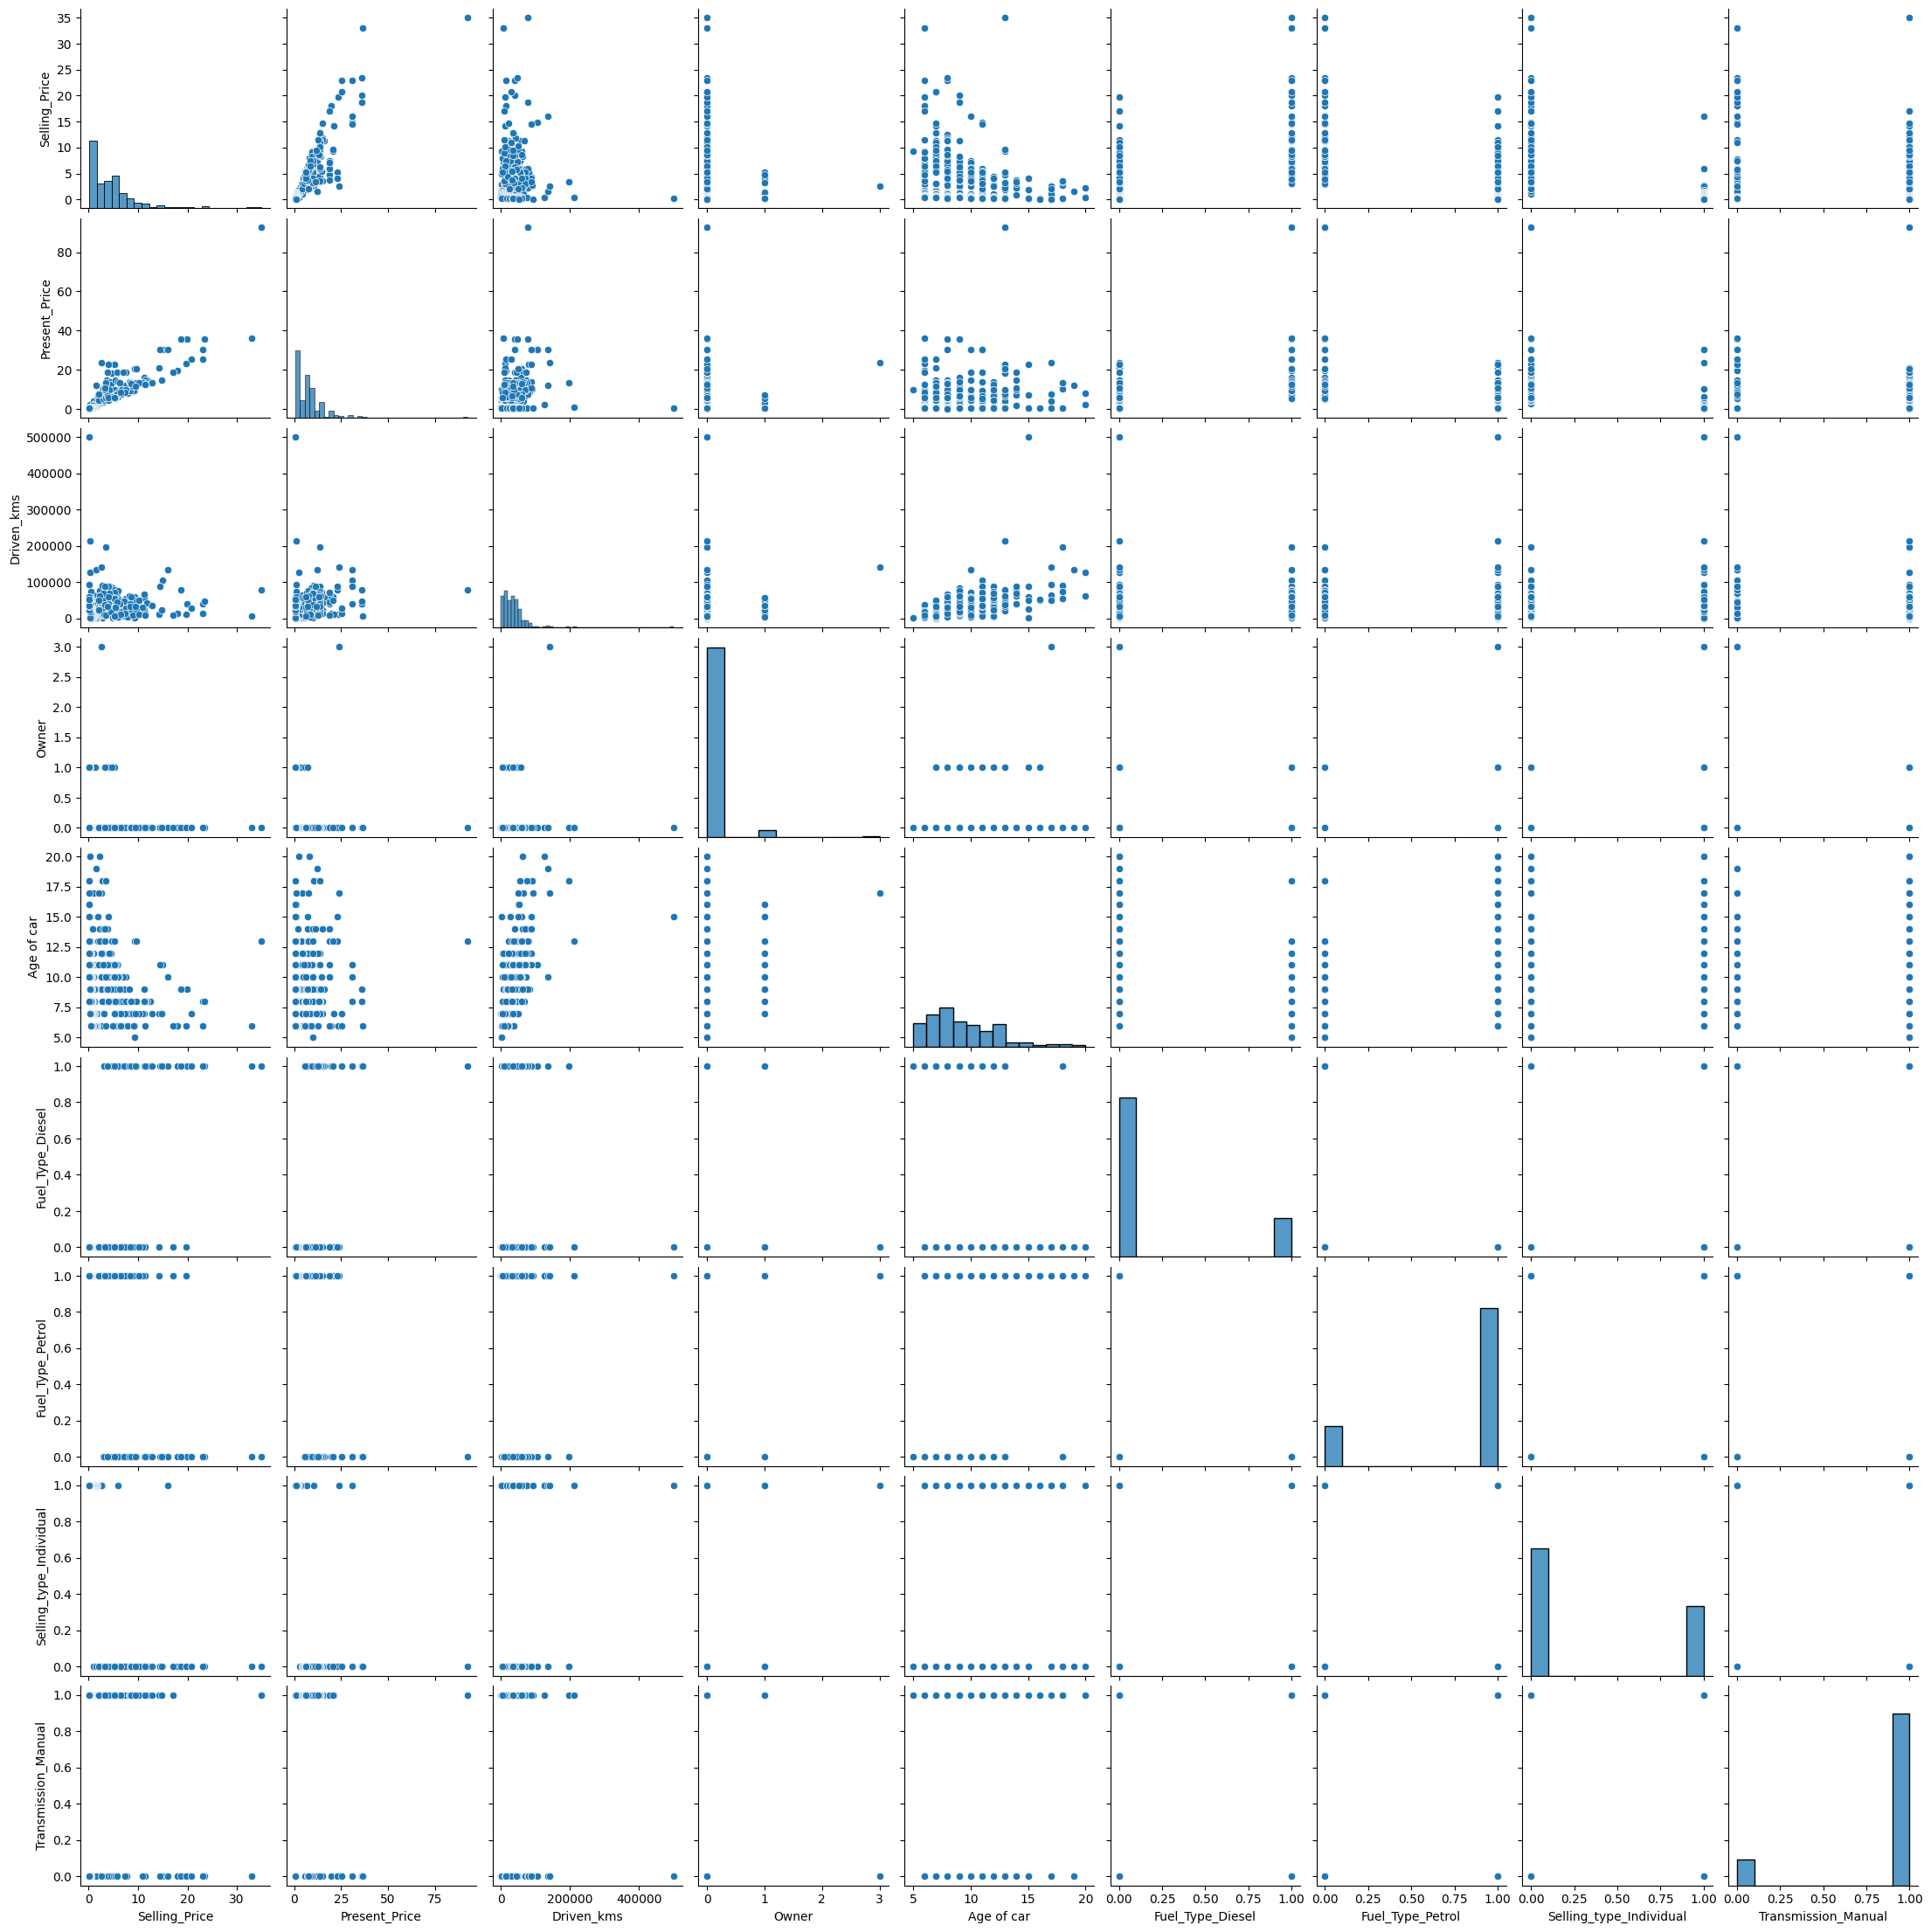

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(car)

<Axes: >

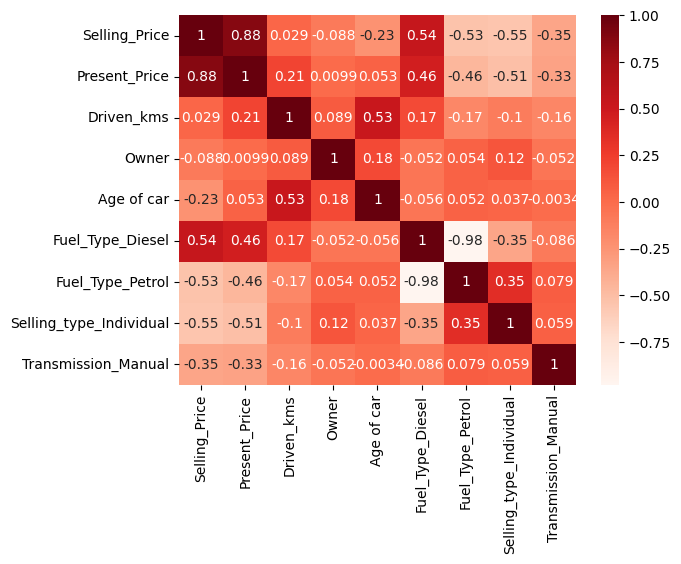

In [ ]:
sns.heatmap(car.corr(), annot= True, cmap= 'Reds')

In [ ]:
# splitting of data

In [ ]:
y = car['Selling_Price'] #DEPENDENT VARIABLE AND TARGET
x = car.drop(columns= ['Selling_Price']) # INPUT AND INDEPENDENT DATA

In [ ]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [ ]:
x

,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,7,1,0,0,1
297,5.90,60000,0,8,0,1,0,1
298,11.00,87934,0,14,0,1,0,1
299,12.50,9000,0,6,1,0,0,1


In [ ]:
x['Owner'].unique()

array([0, 1, 3], dtype=int32)

In [ ]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[4.60373305e-01 3.87627471e-02 3.24632587e-04 8.75604746e-02
 7.82498965e-02 2.58320196e-02 2.20410013e-01 8.84869119e-02]


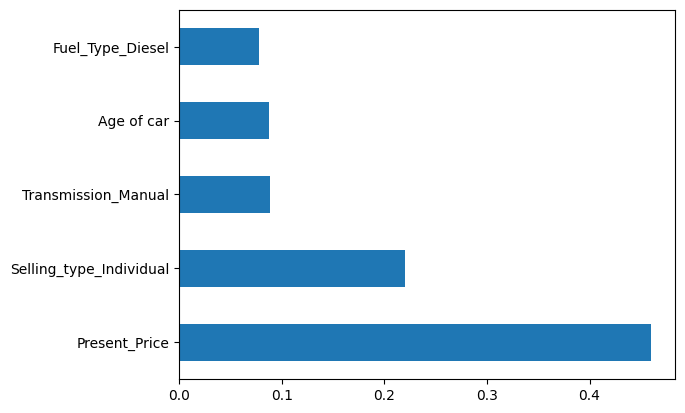

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

In [ ]:
x_train.shape

(239, 8)

In [ ]:
x_test.shape

(60, 8)

# **BUILDING MODEL**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Creating a RandomForestRegressor without specifying the 'criterion' parameter
regressor = RandomForestRegressor()

# Fit the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
ypred = regressor.predict(x_test)


In [ ]:
ypred


array([ 0.2149,  8.3645,  2.557 ,  1.5102,  4.3985, 16.2116,  4.281 ,
        0.5384, 14.3307,  1.1725,  2.9375,  0.2268, 21.7543,  3.01  ,
        1.879 ,  2.479 ,  4.8055, 20.0364,  7.6373,  7.4579,  6.854 ,
        1.2317, 10.6858,  4.3539,  0.6319,  4.9366,  3.3585, 20.4394,
       12.0728,  0.2852,  6.7657,  1.0715,  2.9555,  2.58  ,  4.2595,
        4.6595,  4.3695,  0.2061,  4.8002,  0.4587,  5.6926,  6.4265,
       15.0923,  3.5775,  5.2446,  1.0645,  1.586 ,  5.9496,  5.167 ,
        9.2965,  4.484 , 12.3389,  6.3485,  7.6393,  0.766 ,  1.1836,
        2.846 ,  7.287 ,  2.5865,  0.5934])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.9052515703157581

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],  # Use valid criterion values
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
random_cv = RandomizedSearchCV(estimator=regressor, param_distributions=parameters, n_iter=10,
                               scoring ='neg_mean_absolute_error',random_state=42, cv=5, verbose=2, n_jobs=-1)

In [ ]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [ ]:
random_cv.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'squared_error'}

In [ ]:
random_cv.best_score_

-0.8327206021080247

In [ ]:
predictions=random_cv.predict(x_test)

<Axes: xlabel='Selling_Price', ylabel='Density'>

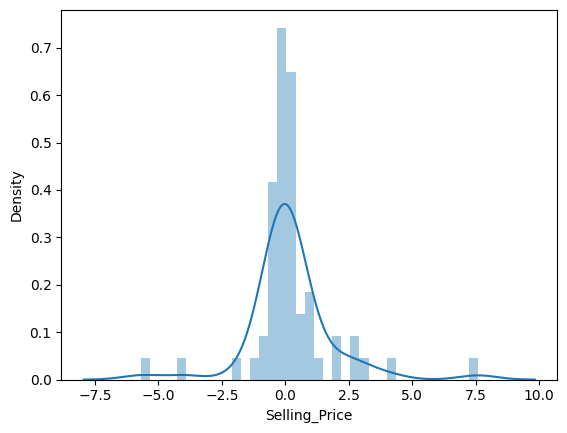

In [ ]:
sns.distplot(y_test-predictions)

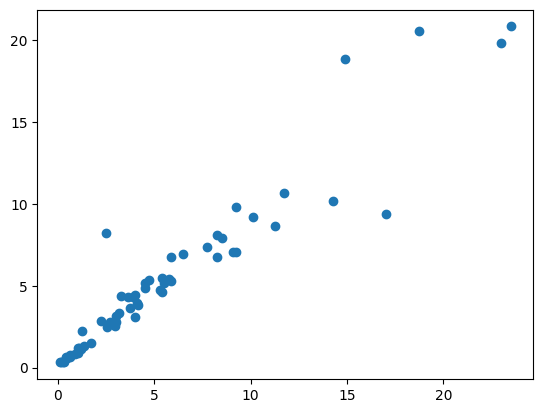

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9224846778214711
MSE: 2.8694793270151484
RMSE: 1.6939537558667734


In [ ]:
### predicting a singe observation
x.head(3)

,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1


In [ ]:
single_ob = np.array([9.5, 15000, 0.0, 5.0, 1.0, 0.0, 0.0, 1.0])
single_ob = single_ob.reshape(1, -1)

In [ ]:
regressor.predict(single_ob)

array([8.434])

In [ ]:
car.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1
